In [1]:
# Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle('time.pkl')

In [3]:
df.sample(10)

,Place,Number,Name,Age,Hometown,Pace,Net_Time1,Gun_Time1,Gun_Net_Diff,Division,Gender,g_hour,g_minute,g_second,n_hour,n_minute,n_second,g_total_time,n_total_time
607,1059,2700,Elizabeth Virgin,32.0,Washington DC,12.21,1900-01-01 01:16:42,1900-01-01 01:21:55,00:05:13,30-39,female,1,21,55,1,16,42,81.92,76.70
791,198,1971,Lisa Moss,38.0,Rockville MD,8.04,1900-01-01 00:50:07,1900-01-01 00:51:37,00:01:30,30-39,female,0,51,37,0,50,7,51.62,50.12
285,286,2029,John Nichols,42.0,Silver Spring MD,7.15,1900-01-01 00:44:59,1900-01-01 00:46:07,00:01:08,40-49,male,0,46,7,0,44,59,46.12,44.98
754,755,887,James Dalbora,45.0,Olney MD,8.37,1900-01-01 00:53:30,1900-01-01 00:57:11,00:03:41,40-49,male,0,57,11,0,53,30,57.18,53.50
62,530,1269,Sandra Grance,25.0,Alexandria VA,9.14,1900-01-01 00:57:17,1900-01-01 01:00:29,00:03:12,20-29,female,1,0,29,0,57,17,60.48,57.28
641,1096,3274,Cynthia Wong,36.0,Rockville MD,15.13,1900-01-01 01:34:30,1900-01-01 01:37:54,00:03:24,30-39,female,1,37,54,1,34,30,97.90,94.50
795,154,2543,Sarah Stanley,26.0,Gaithersburg MD,7.51,1900-01-01 00:48:45,1900-01-01 00:51:45,00:03:00,20-29,female,0,51,45,0,48,45,51.75,48.75
827,828,1013,Patrick Durbin,45.0,Rockville MD,8.52,1900-01-01 00:55:01,1900-01-01 00:58:15,00:03:14,40-49,male,0,58,15,0,55,1,58.25,55.02
52,53,1728,Leyi Lin,26.0,Washington DC,5.52,1900-01-01 00:36:28,1900-01-01 00:36:30,00:00:02,20-29,male,0,36,30,0,36,28,36.50,36.47
930,320,2051,Catherine O'hara,37.0,Boyds MD,8.35,1900-01-01 00:53:20,1900-01-01 00:56:26,00:03:06,30-39,female,0,56,26,0,53,20,56.43,53.33


In [4]:
df.columns


Index(['Place', 'Number', 'Name', 'Age', 'Hometown', 'Pace', 'Net_Time1',
       'Gun_Time1', 'Gun_Net_Diff', 'Division', 'Gender', 'g_hour', 'g_minute',
       'g_second', 'n_hour', 'n_minute', 'n_second', 'g_total_time',
       'n_total_time'],
      dtype='object')

In [5]:
df.shape

(2362, 19)

In [6]:
# create a sub dataframe to anlyze the difference in metrices 

keep =['Place', 'Number','Age', 'Name','Gun_Net_Diff','Gender',
       'g_total_time','n_total_time','Division','Pace']
df_diff =df[keep]
df_diff.sample(5)

,Place,Number,Age,Name,Gun_Net_Diff,Gender,g_total_time,n_total_time,Division,Pace
882,255,1261,50.0,Cathy Gormley,00:03:19,female,54.92,51.60,50-59,8.19
35,36,409,20.0,Justin Ahn,00:00:01,male,35.48,35.47,20-29,5.43
791,198,1971,38.0,Lisa Moss,00:01:30,female,51.62,50.12,30-39,8.04
668,669,514,11.0,Michael Aubertin,00:03:08,male,54.98,51.85,14 or less,8.21
752,163,462,49.0,Nancy Alexaner,00:01:10,female,50.23,49.07,40-49,7.54


In [7]:
#convert timedelta to seconds
df_diff['diff_sec']=df_diff.Gun_Net_Diff/ np.timedelta64(1, 's')
df_diff.sample(5)

,Place,Number,Age,Name,Gun_Net_Diff,Gender,g_total_time,n_total_time,Division,Pace,diff_sec
924,925,3276,29.0,Daniel Alman,00:03:21,male,60.52,57.17,20-29,9.12,201.0
25,26,14,40.0,Helen Beven,00:00:01,female,41.17,41.15,40-49,6.38,1.0
1055,463,649,27.0,Brianna Boyle,00:03:13,female,58.95,55.73,20-29,8.59,193.0
936,308,2114,41.0,Lisa Pavia,00:03:24,female,56.53,53.13,40-49,8.33,204.0
375,376,2979,43.0,Eric Bilsky,00:01:23,male,48.13,46.75,40-49,7.32,83.0


In [8]:
df_diff.groupby('Gender')['diff_sec'].agg(['mean','median'])

,mean,median
Gender,,
female,194.851953,209.0
male,150.077716,185.0


In [9]:
df_diff.groupby('Age')['diff_sec'].agg(['mean','median'])

,mean,median
Age,,
1.0,220.000000,220.0
9.0,235.000000,235.0
10.0,251.000000,223.0
11.0,141.000000,141.0
12.0,171.875000,189.0
13.0,184.181818,196.0
14.0,199.230769,219.0
15.0,116.764706,83.0
16.0,119.631579,76.0


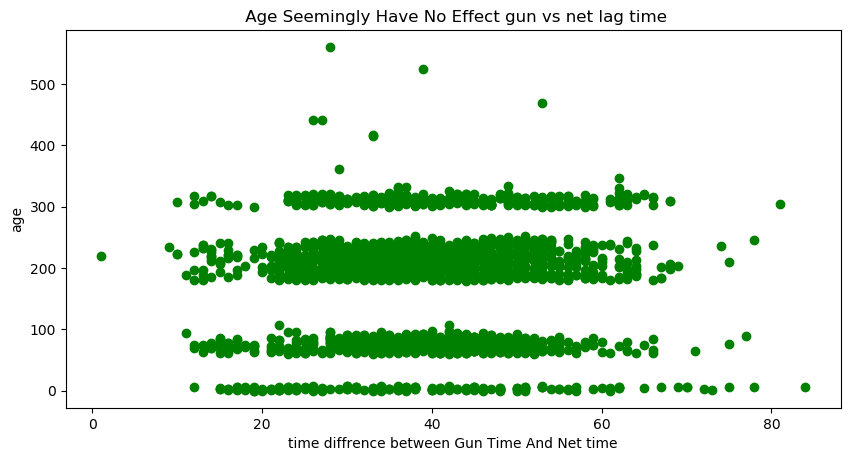

In [10]:
#Checking for a relationship between comments and upvotes
plt.figure(figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(df_diff['Age'],df_diff['diff_sec'], c='g')
plt.xlabel('time diffrence between Gun Time And Net time')
plt.ylabel('age')
plt.title(" Age Seemingly Have No Effect gun vs net lag time");

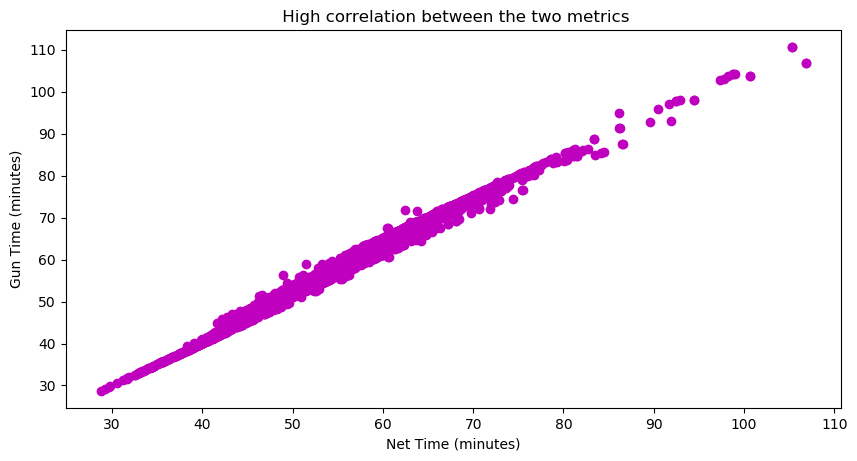

In [11]:
#Checking for a relationship between Gun Time and Net Time
plt.figure(figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(df_diff['n_total_time'],df_diff['g_total_time'], c='m')
plt.xlabel('Net Time (minutes)')
plt.ylabel('Gun Time (minutes)')
plt.title(" High correlation between the two metrics");

In [12]:
df_diff.groupby('Gender')['diff_sec'].agg(['mean'])

,mean
Gender,
female,194.851953
male,150.077716


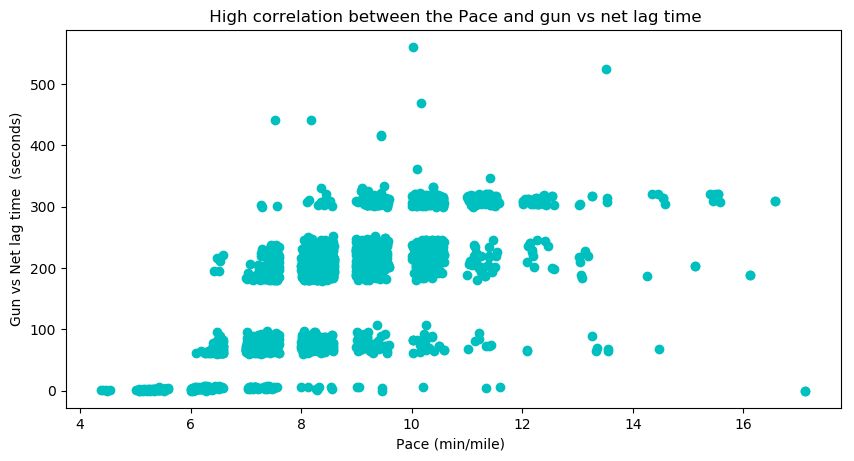

In [13]:
#Checking for a relationship between Pace and Reaction Time 
plt.figure(figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(df_diff['Pace'],df_diff['diff_sec'], c='c')
plt.xlabel('Pace (min/mile) ')
plt.ylabel('Gun vs Net lag time  (seconds)')
plt.title(" High correlation between the Pace and gun vs net lag time");

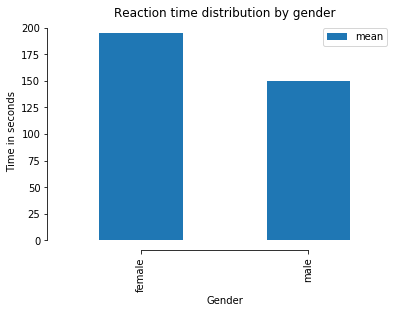

In [14]:
# statistical distribution of mean for reaction time by gender
plot1= df_diff.groupby('Gender')['diff_sec'].agg(['mean']).plot(kind='bar')
plt.rcParams['figure.figsize'] = (8.75, 7.0)
ax = plt.axes()
ax.set_title("Reaction time distribution by gender")
ax.set_ylabel('Time in seconds')
ax.set_xlabel('Gender')
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}
plt.rc('font', **font)
plt.show()

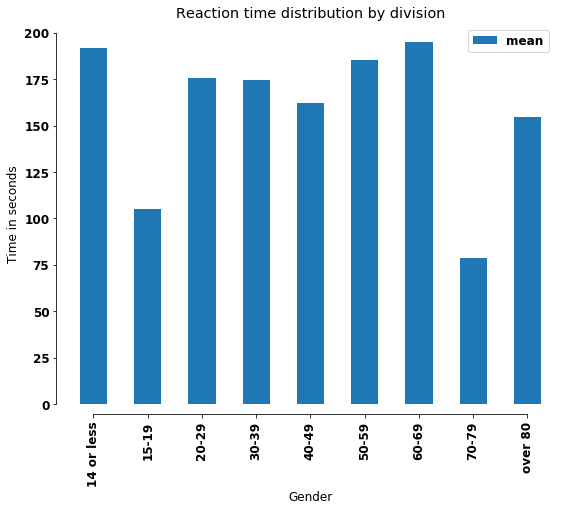

In [15]:
# statistical distribution of mean for reaction time by divison
plot1= df_diff.groupby('Division')['diff_sec'].agg(['mean']).plot(kind='bar')
plt.rcParams['figure.figsize'] = (8.75, 7.0)
ax = plt.axes()
ax.set_title("Reaction time distribution by division")
ax.set_ylabel('Time in seconds')
ax.set_xlabel('Gender')
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}
plt.rc('font', **font)
plt.show()

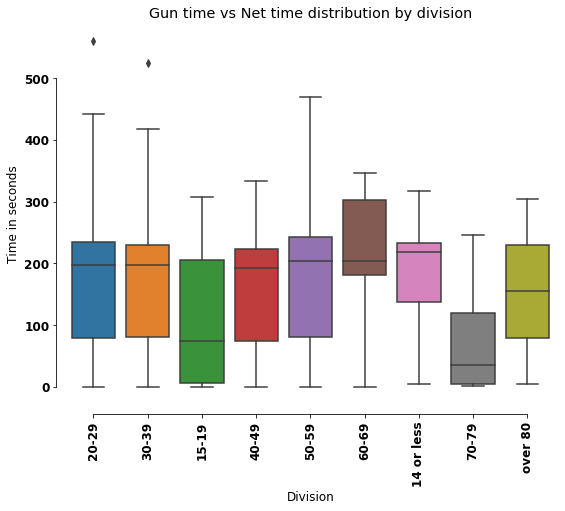

In [16]:
# Mode, range and IQR visualization of reaction time by division
plt.rcParams['figure.figsize'] = (8.75, 7.0)
ax = plt.axes()
plot1 = sns.boxplot(data=df_diff, x='Division', y='diff_sec')
ax.set_title("Gun time vs Net time distribution by division")
ax.set_ylabel('Time in seconds')
ax.set_xlabel('Division')
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)
plt.show()

In [17]:
df_diff.head()

,Place,Number,Age,Name,Gun_Net_Diff,Gender,g_total_time,n_total_time,Division,Pace,diff_sec
0,1,9,22.0,Joshua Kemei,00:00:01,male,28.80,28.78,20-29,4.38,1.0
1,2,35,22.0,George Kirwa Misoi,00:00:01,male,29.18,29.17,20-29,4.42,1.0
2,3,3,24.0,Jacob Frey,00:00:01,male,29.63,29.62,20-29,4.46,1.0
3,4,49,27.0,Gurmessa Kumsa,00:00:00,male,29.77,29.77,20-29,4.48,0.0
4,5,31,24.0,Mike Baird,00:00:01,male,30.52,30.50,20-29,4.55,1.0


In [18]:
df_diff[df_diff['diff_sec']==0]

,Place,Number,Age,Name,Gun_Net_Diff,Gender,g_total_time,n_total_time,Division,Pace,diff_sec
3,4,49,27.0,Gurmessa Kumsa,0 days,male,29.77,29.77,20-29,4.48,0.0
7,8,48,20.0,Haile Gelalcha,0 days,male,31.65,31.65,20-29,5.06,0.0
8,9,33,26.0,John Bitok,0 days,male,31.92,31.92,20-29,5.09,0.0
9,10,50,19.0,Dema Woyessa,0 days,male,32.50,32.50,15-19,5.14,0.0
15,16,2299,37.0,Stavros Rologas,0 days,male,33.17,33.17,30-39,5.21,0.0
19,20,2135,51.0,Terry Permar,0 days,male,33.70,33.70,50-59,5.26,0.0
27,28,17,50.0,Dan Lawson,0 days,male,34.48,34.48,50-59,5.33,0.0
50,51,3242,48.0,Dennis Coleman,0 days,male,36.32,36.32,40-49,5.51,0.0
59,60,411,19.0,Mike Montano,0 days,male,37.20,37.20,15-19,6.00,0.0
67,68,19,61.0,Patrick Griffith,0 days,male,37.65,37.65,60-69,6.04,0.0


In [19]:
high=df_diff['diff_sec'].quantile(.01)
low=df_diff['diff_sec'].quantile(.99)


In [20]:
df_diff[df_diff['diff_sec']==high]

,Place,Number,Age,Name,Gun_Net_Diff,Gender,g_total_time,n_total_time,Division,Pace,diff_sec
0,1,9,22.0,Joshua Kemei,00:00:01,male,28.80,28.78,20-29,4.38,1.0
1,2,35,22.0,George Kirwa Misoi,00:00:01,male,29.18,29.17,20-29,4.42,1.0
2,3,3,24.0,Jacob Frey,00:00:01,male,29.63,29.62,20-29,4.46,1.0
4,5,31,24.0,Mike Baird,00:00:01,male,30.52,30.50,20-29,4.55,1.0
5,6,1662,23.0,Jon Lauder,00:00:01,male,31.23,31.22,20-29,5.02,1.0
12,13,27,32.0,Albert Haan,00:00:01,male,32.95,32.93,30-39,5.18,1.0
13,14,825,36.0,Mike Colaiacovo,00:00:01,male,33.02,33.00,30-39,5.19,1.0
14,15,15,48.0,Mark Malander,00:00:01,male,33.12,33.10,40-49,5.20,1.0
17,18,405,20.0,Alvin Yew,00:00:01,male,33.53,33.52,20-29,5.24,1.0
21,22,5,40.0,Darrell General,00:00:01,male,34.05,34.03,40-49,5.29,1.0


In [21]:
df_diff[df_diff['diff_sec']==low]#['Age'].mean()

,Place,Number,Age,Name,Gun_Net_Diff,Gender,g_total_time,n_total_time,Division,Pace,diff_sec
799,800,2414,36.0,Matt Seubert,00:05:21,male,59.72,54.37,30-39,8.45,321.0
1222,1223,880,44.0,Andre Cutar,00:05:21,male,77.32,71.97,40-49,11.35,321.0
1260,1261,2792,49.0,Kenneth Winkfield,00:05:21,male,95.83,90.48,40-49,14.34,321.0
1261,1262,63,63.0,Thom Hunter,00:05:21,male,102.68,97.33,60-69,15.40,321.0
1263,1264,3330,45.0,Cliff Chiet,00:05:21,male,104.12,98.77,40-49,15.54,321.0
554,998,146,48.0,Jeanette Edwards,00:05:21,female,75.93,70.58,40-49,11.22,321.0
638,1091,943,36.0,Leyla Diaz,00:05:21,female,97.00,91.65,30-39,14.45,321.0
644,1098,2627,35.0,Marci Thomas,00:05:21,female,103.60,98.25,30-39,15.49,321.0


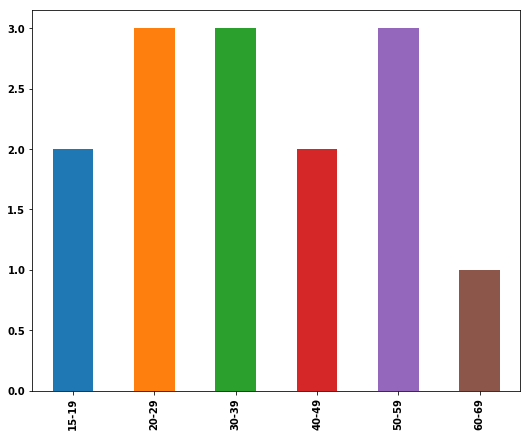

In [22]:
df_diff[df_diff['diff_sec']==0]['Division'].value_counts().sort_index().plot(kind='bar')

In [23]:
df_diff.sort_values('g_total_time').head()

,Place,Number,Age,Name,Gun_Net_Diff,Gender,g_total_time,n_total_time,Division,Pace,diff_sec
0,1,9,22.0,Joshua Kemei,00:00:01,male,28.80,28.78,20-29,4.38,1.0
1,2,35,22.0,George Kirwa Misoi,00:00:01,male,29.18,29.17,20-29,4.42,1.0
2,3,3,24.0,Jacob Frey,00:00:01,male,29.63,29.62,20-29,4.46,1.0
3,4,49,27.0,Gurmessa Kumsa,00:00:00,male,29.77,29.77,20-29,4.48,0.0
4,5,31,24.0,Mike Baird,00:00:01,male,30.52,30.50,20-29,4.55,1.0


In [24]:
df_diff.sort_values('n_total_time').head()

,Place,Number,Age,Name,Gun_Net_Diff,Gender,g_total_time,n_total_time,Division,Pace,diff_sec
0,1,9,22.0,Joshua Kemei,00:00:01,male,28.80,28.78,20-29,4.38,1.0
1,2,35,22.0,George Kirwa Misoi,00:00:01,male,29.18,29.17,20-29,4.42,1.0
2,3,3,24.0,Jacob Frey,00:00:01,male,29.63,29.62,20-29,4.46,1.0
3,4,49,27.0,Gurmessa Kumsa,00:00:00,male,29.77,29.77,20-29,4.48,0.0
4,5,31,24.0,Mike Baird,00:00:01,male,30.52,30.50,20-29,4.55,1.0


In [25]:
df_diff[df_diff['Gender']=='female'].sort_values('n_total_time').head()

,Place,Number,Age,Name,Gun_Net_Diff,Gender,g_total_time,n_total_time,Division,Pace,diff_sec
0,1,30,22.0,Florence Jepkosgei,00:00:01,female,32.98,32.97,20-29,5.19,1.0
1,2,8,21.0,Eunice Chepkirui,00:00:01,female,33.23,33.22,20-29,5.21,1.0
2,3,3200,36.0,Elena Orlova,00:00:01,female,34.43,34.42,30-39,5.33,1.0
3,4,2,34.0,Susannah Kvasnicka,00:00:01,female,34.72,34.70,30-39,5.35,1.0
4,5,6,26.0,Casey Smith,00:00:02,female,35.07,35.03,20-29,5.39,2.0


In [26]:
df_diff[df_diff['Gender']=='female'].sort_values('g_total_time').head()

,Place,Number,Age,Name,Gun_Net_Diff,Gender,g_total_time,n_total_time,Division,Pace,diff_sec
0,1,30,22.0,Florence Jepkosgei,00:00:01,female,32.98,32.97,20-29,5.19,1.0
1,2,8,21.0,Eunice Chepkirui,00:00:01,female,33.23,33.22,20-29,5.21,1.0
2,3,3200,36.0,Elena Orlova,00:00:01,female,34.43,34.42,30-39,5.33,1.0
3,4,2,34.0,Susannah Kvasnicka,00:00:01,female,34.72,34.70,30-39,5.35,1.0
4,5,6,26.0,Casey Smith,00:00:02,female,35.07,35.03,20-29,5.39,2.0


In [27]:
df_diff[df_diff['diff_sec']==0]['Gender'].value_counts()

male      12
female     2
Name: Gender, dtype: int64

In [28]:
df_diff[(df_diff['Place']=="1")&(df_diff['Gender']=='male')]

,Place,Number,Age,Name,Gun_Net_Diff,Gender,g_total_time,n_total_time,Division,Pace,diff_sec
0,1,9,22.0,Joshua Kemei,00:00:01,male,28.8,28.78,20-29,4.38,1.0


In [29]:
df_diff[(df_diff['Place']=="1")&(df_diff['Gender']!='male')]

,Place,Number,Age,Name,Gun_Net_Diff,Gender,g_total_time,n_total_time,Division,Pace,diff_sec
0,1,30,22.0,Florence Jepkosgei,00:00:01,female,32.98,32.97,20-29,5.19,1.0


### Chris Doe

In [30]:
df_diff[df_diff['Name']=="Chris Doe"]

,Place,Number,Age,Name,Gun_Net_Diff,Gender,g_total_time,n_total_time,Division,Pace,diff_sec
534,535,2869,44.0,Chris Doe,00:03:24,male,53.12,49.72,40-49,8.0,204.0


In [31]:
df_diff[df_diff['Name']=="Chris Doe"]['n_total_time']-(df_diff[(df_diff['Division']=="40-49") &(df_diff['Gender']=="male")]['n_total_time'].quantile(0.1))

534    8.03
Name: n_total_time, dtype: float64

In [32]:
df_diff[df_diff['Name']=="Chris Doe"]['g_total_time']-(df_diff[(df_diff['Division']=="40-49") &(df_diff['Gender']=="male")]['g_total_time'].quantile(0.1))

534    10.3
Name: g_total_time, dtype: float64

In [33]:
df_diff.to_pickle('time_diff.pkl')

In [34]:
df_diff[df_diff['Gender']=='male']['Division'].value_counts()

40-49         415
30-39         346
50-59         205
20-29         144
60-69          69
15-19          45
14 or less     26
70-79           9
over 80         2
Name: Division, dtype: int64